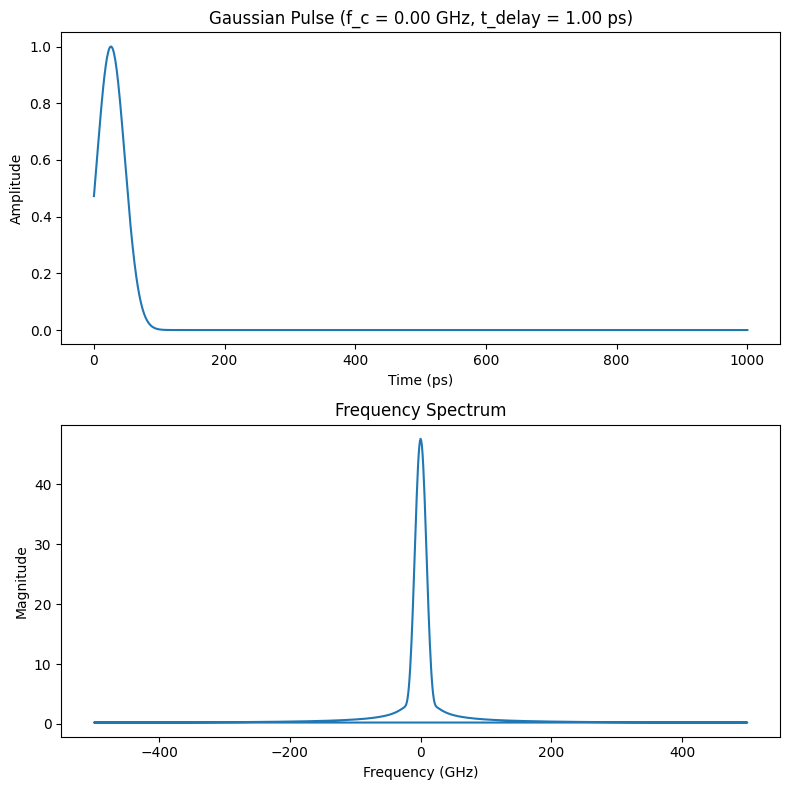

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Prompt user to enter pulse parameters
f_center = float(input("Enter center frequency in Hz: "))
f_width = float(input("Enter frequency width in Hz: "))
t_delay = float(input("Enter time delay in seconds: "))

# Define pulse parameters
t_width = 50e-12        # Time width of pulse in seconds
dt = 1e-12              # Time step size in seconds
t_max = 1000e-12        # Maximum simulation time in seconds

# Create time array
t = np.arange(0, t_max, dt)

# Calculate Gaussian pulse waveform with time delay
gaussian_pulse = np.exp(-(t-t_delay-t_width/2)**2/(2*(t_width/2.355)**2)) * np.cos(2*np.pi*f_center*(t-t_delay))

# Calculate frequency spectrum using Fourier transform
freq = np.fft.fftfreq(len(t), dt)
freq_spectrum = np.fft.fft(gaussian_pulse)
freq_spectrum = np.abs(freq_spectrum)

# Plot pulse waveform and frequency spectrum
fig, axs = plt.subplots(2,1,figsize=(8,8))
axs[0].plot(t*1e12, gaussian_pulse)
axs[0].set_xlabel('Time (ps)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Gaussian Pulse (f_c = %.2f GHz, t_delay = %.2f ps)' % (f_center/1e9, t_delay*1e12))
axs[1].plot(freq/1e9, freq_spectrum)
axs[1].set_xlabel('Frequency (GHz)')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('Frequency Spectrum')
plt.tight_layout()
plt.show()
